In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_img(image, nrows, ncols, index, title):
    plt.subplot(nrows, ncols, index)
    plt.imshow(image, cmap="gray")
    plt.title(title)

In [6]:
def ideal_low_pass(image, D0):
    M, N = image.shape
    P, Q = M, N
    H = np.zeros((P, Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            if(D <= D0):
                H[u, v] = 1
    return image*H


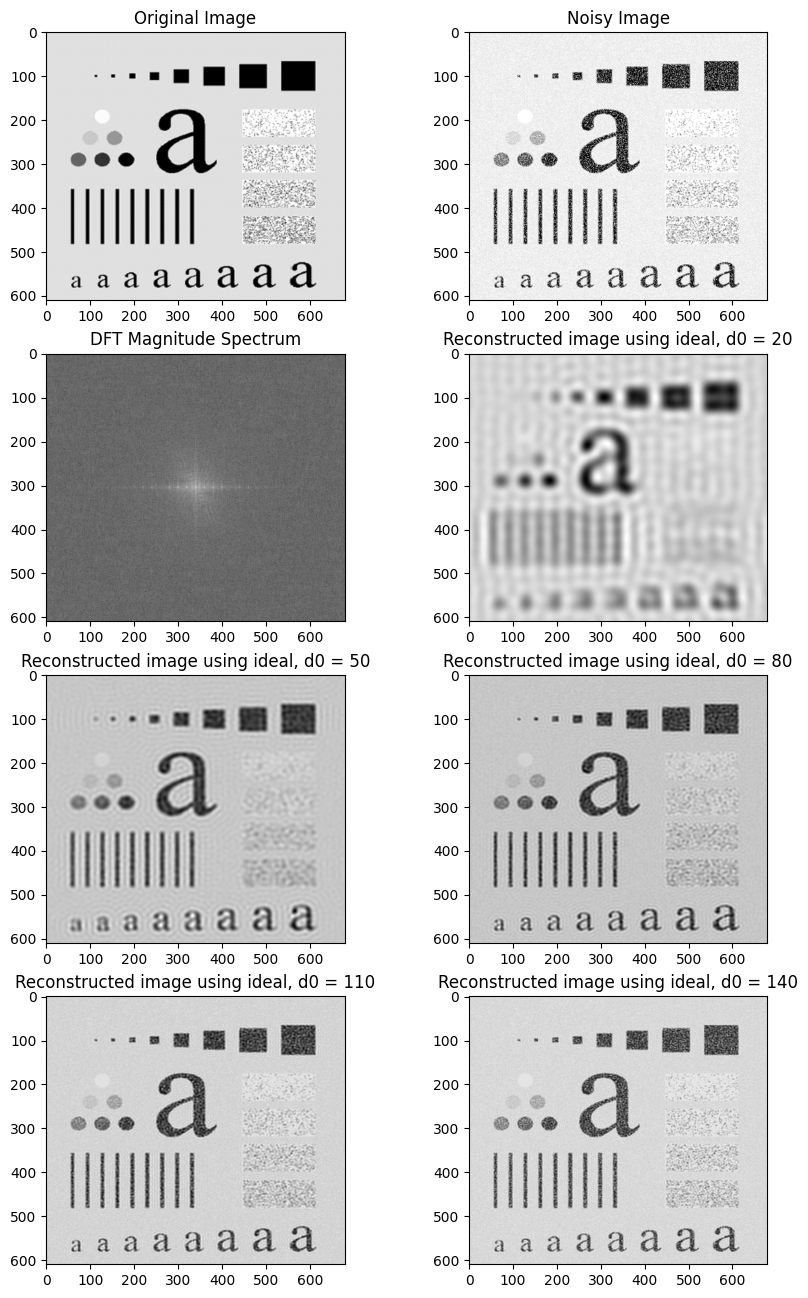

In [9]:
# Load BGR image
original_image_bgr = cv2.imread("../SrcImage/filteringImage.jpg")
# Convert to grayscale
original_image = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2GRAY)

# Generate Gaussian noise
noise = np.random.normal(7, 10, original_image.shape).astype(dtype=np.uint8)
# noise = original_image

# Add noise to the original image
noisy_image = cv2.add(original_image, noise)


# Perform FFT on the image
fft_image = np.fft.fft2(noisy_image)
fft_shifted = np.fft.fftshift(fft_image)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

plt.figure(figsize=(10,16))

plot_img(original_image, 4, 2, 1, "Original Image")
plot_img(noisy_image, 4, 2, 2, "Noisy Image")
plot_img(magnitude_spectrum, 4, 2, 3, "DFT Magnitude Spectrum")

# Using Ideal Filter
D0 = 20
for i in range(5):
    filtered_ideal = ideal_low_pass(fft_shifted, D0)
    # Perform Inverse FFT on ideal filtered image
    reconstructed_shifted = np.fft.ifftshift(filtered_ideal)
    reconstructed_shifted_ifft = np.fft.ifft2(reconstructed_shifted).real
    plot_img(reconstructed_shifted_ifft, 4, 2, 4 + i, f"Reconstructed image using ideal, d0 = {D0}")
    D0 += 30
plt.show()




